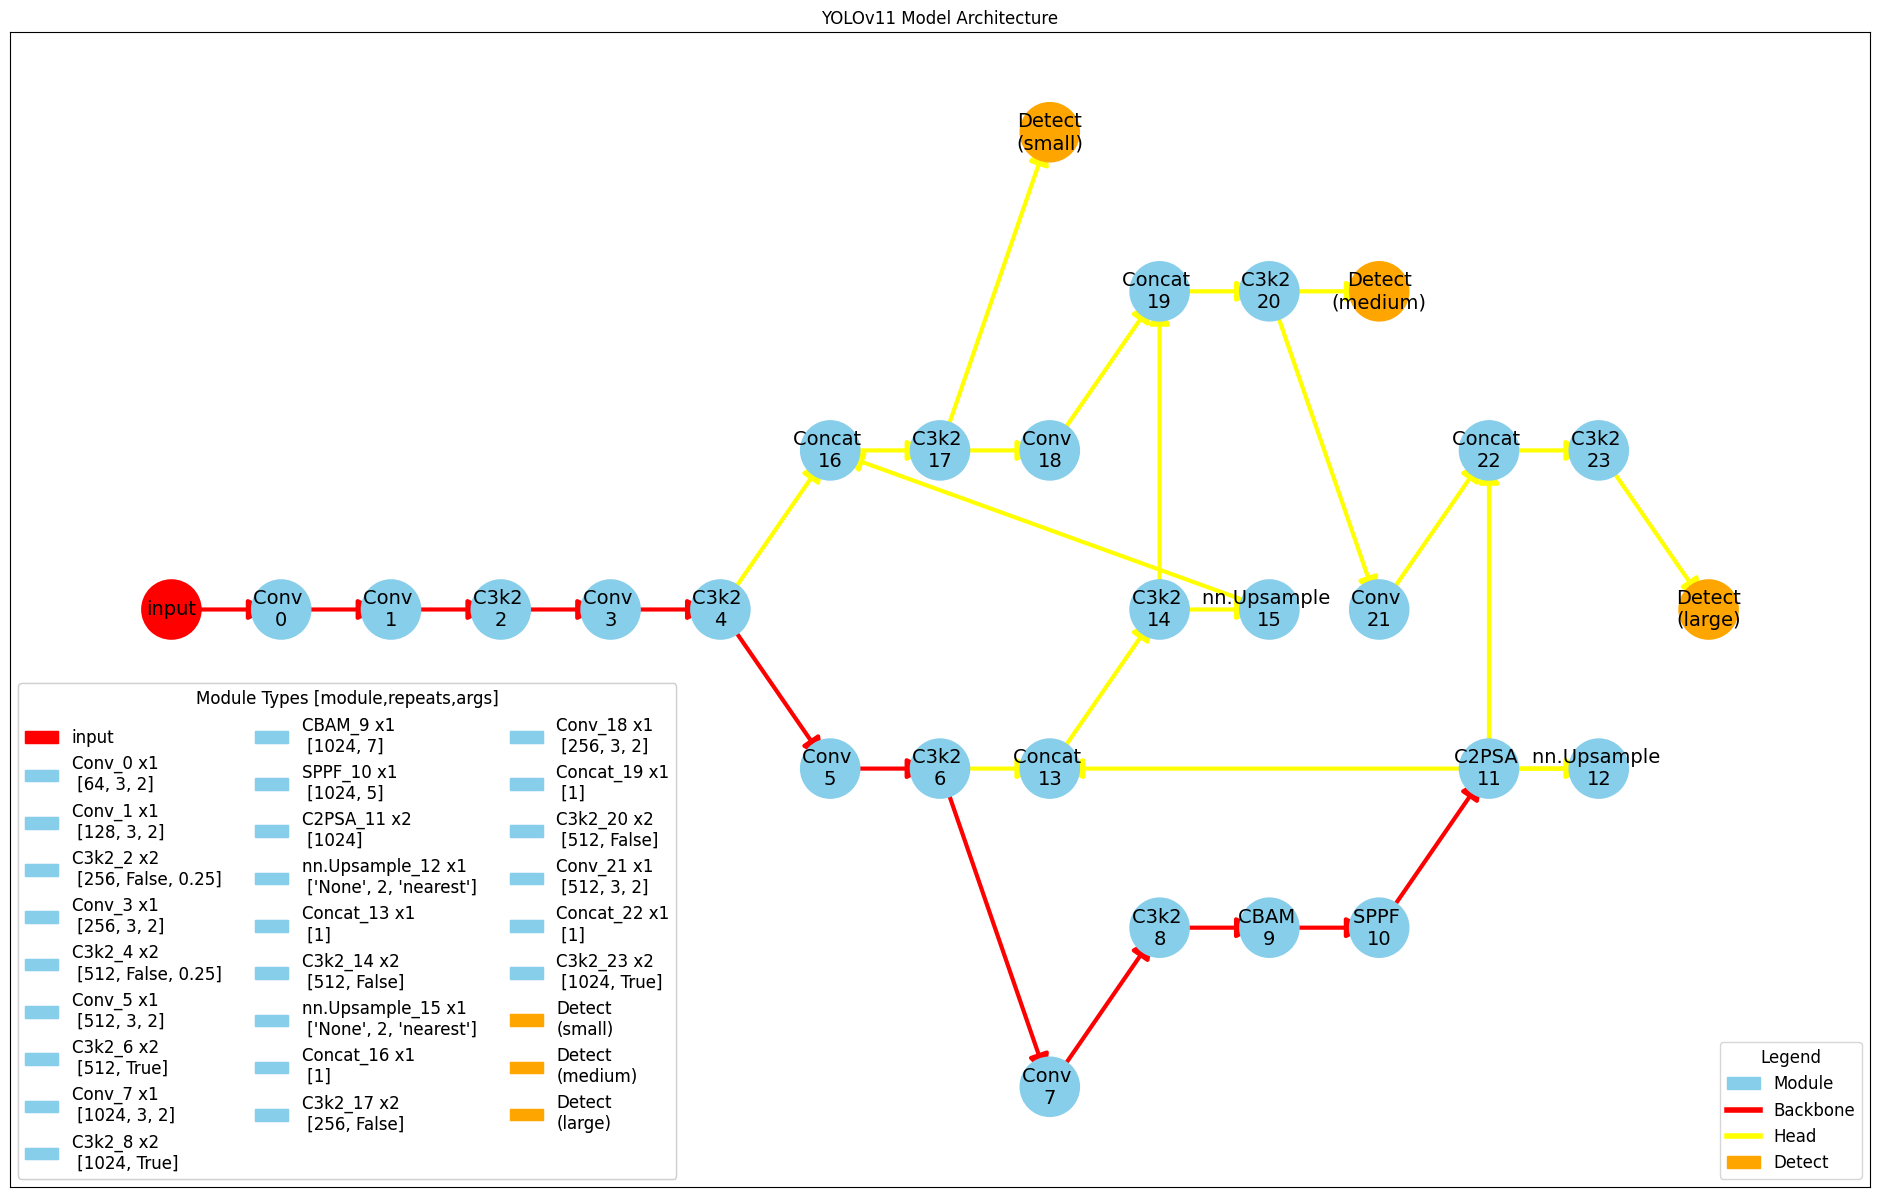

In [348]:
import networkx as nx
import matplotlib.pyplot as plt
import yaml

cfg = "ultralytics/cfg/models/11/yolo11n-my.yaml"
inputNodeColor = 'red'
detectNodeColor = 'orange'
NodeColor = 'skyblue'
backboneEdgeColor = 'red'
headEdgeColor = 'yellow'

G = nx.DiGraph()
with open(cfg, 'r', encoding='utf-8') as file:
    data = yaml.safe_load(file)
    backbone_layers = data['backbone']
    head_layers = data['head']

nodes = []
G.add_node('input', layer_type='input', args=[],path = 'input', repeats=1)
for i, (fromNode, repeats, module, args) in enumerate(backbone_layers):
    nodeName = f'{module} \n{len(nodes)}'
    if i == 0:
        from_node = 'input'
    else:
        if fromNode == -1:
            from_node = list(nodes)[-1]
        else:
            from_node = list(nodes)[fromNode]
    G.add_node(nodeName, layer_type=module, args=args, path = f'backbone', repeats=repeats)
    nodes += [nodeName]
    G.add_edge(from_node, nodeName)

for i, (fromNode, repeats, module, args) in enumerate(head_layers):
    if fromNode == -1:
        from_node = list(nodes)[-1]
        nodeName = f'{module} \n{len(nodes)}'
        G.add_node(nodeName, layer_type=module, args=args, path = f'head', repeats=repeats)
        nodes += [nodeName]
        G.add_edge(from_node, nodeName)

    if type(fromNode) == list:
        if module != 'Detect':
            nodeName = f'{module} \n{len(nodes)}'
            G.add_node(nodeName, layer_type=module, args=args, path = f'head', repeats=repeats)
            nodes += [nodeName]
            for from_node in fromNode:
                if from_node == -1:
                    from_node = list(nodes)[-2]
                    G.add_edge(from_node, nodeName)
                else:
                    G.add_edge(list(nodes)[from_node], nodeName)
        else:
            for i,(from_node) in enumerate(fromNode):
                nodeName = f'Detect'
                if i == 0:
                    nodeName = f'Detect\n(small)'
                if i == 1:
                    nodeName = f'Detect\n(medium)'
                if i == 2:
                    nodeName = f'Detect\n(large)'
                G.add_node(nodeName, layer_type=module, args=args, path = f'Detect', repeats=repeats)
                nodes += [nodeName]
                G.add_edge(list(nodes)[from_node], nodeName)

pos = nx.bfs_layout(G, 'input',align='vertical')
# pos = nx.spiral_layout(G)
plt.figure(figsize=(16*1.5, 10*1.5))
node_colors = []
for node in G.nodes():
    if G.nodes[node]["path"] == 'input':
        node_colors.append(inputNodeColor)
    elif G.nodes[node]["path"] == 'Detect':
        node_colors.append(detectNodeColor)
    else:
        node_colors.append(NodeColor)

nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, node_size=1000,
                 edge_color='gray', linewidths=12, font_size=14)


for (u, v, d) in G.edges(data=True):
    if G.nodes[v]["path"] == 'backbone':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=3, arrowstyle='-|>', edge_color=backboneEdgeColor,arrowsize=30)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=3, arrowstyle='-|>',edge_color=headEdgeColor,arrowsize=30)



legend_elements = [
    plt.Circle((0, 0), 1, color=NodeColor, label='Module'),
                   plt.Line2D([0], [0], color=backboneEdgeColor, lw=4, label='Backbone'),
                   plt.Line2D([0], [0], color=headEdgeColor, lw=4, label='Head'),
    plt.Circle((0, 0), 1, color=detectNodeColor, label='Detect')
]

legend1 = plt.legend(handles=legend_elements, loc='lower right', title='Legend', fontsize='large',title_fontsize='large')

detail_legent = []
for i,(node) in enumerate(G.nodes()):
    if G.nodes[node]["path"] != 'input' and G.nodes[node]["path"] != 'Detect':
        detail_legent.append(plt.Circle((0, 0), 1, color=node_colors[i], label=f'{G.nodes[node]["layer_type"]}_{i-1} x{G.nodes[node]["repeats"]}\n {G.nodes[node]["args"]}'))
    else:
        detail_legent.append(plt.Circle((0, 0), 1, color=node_colors[i], label=f'{node}'))

legend2 = plt.legend(handles=detail_legent, loc='lower left', title='Module Types [module,repeats,args]', fontsize='large', ncol=3,title_fontsize='large')

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.title('YOLOv11 Model Architecture')
plt.show()


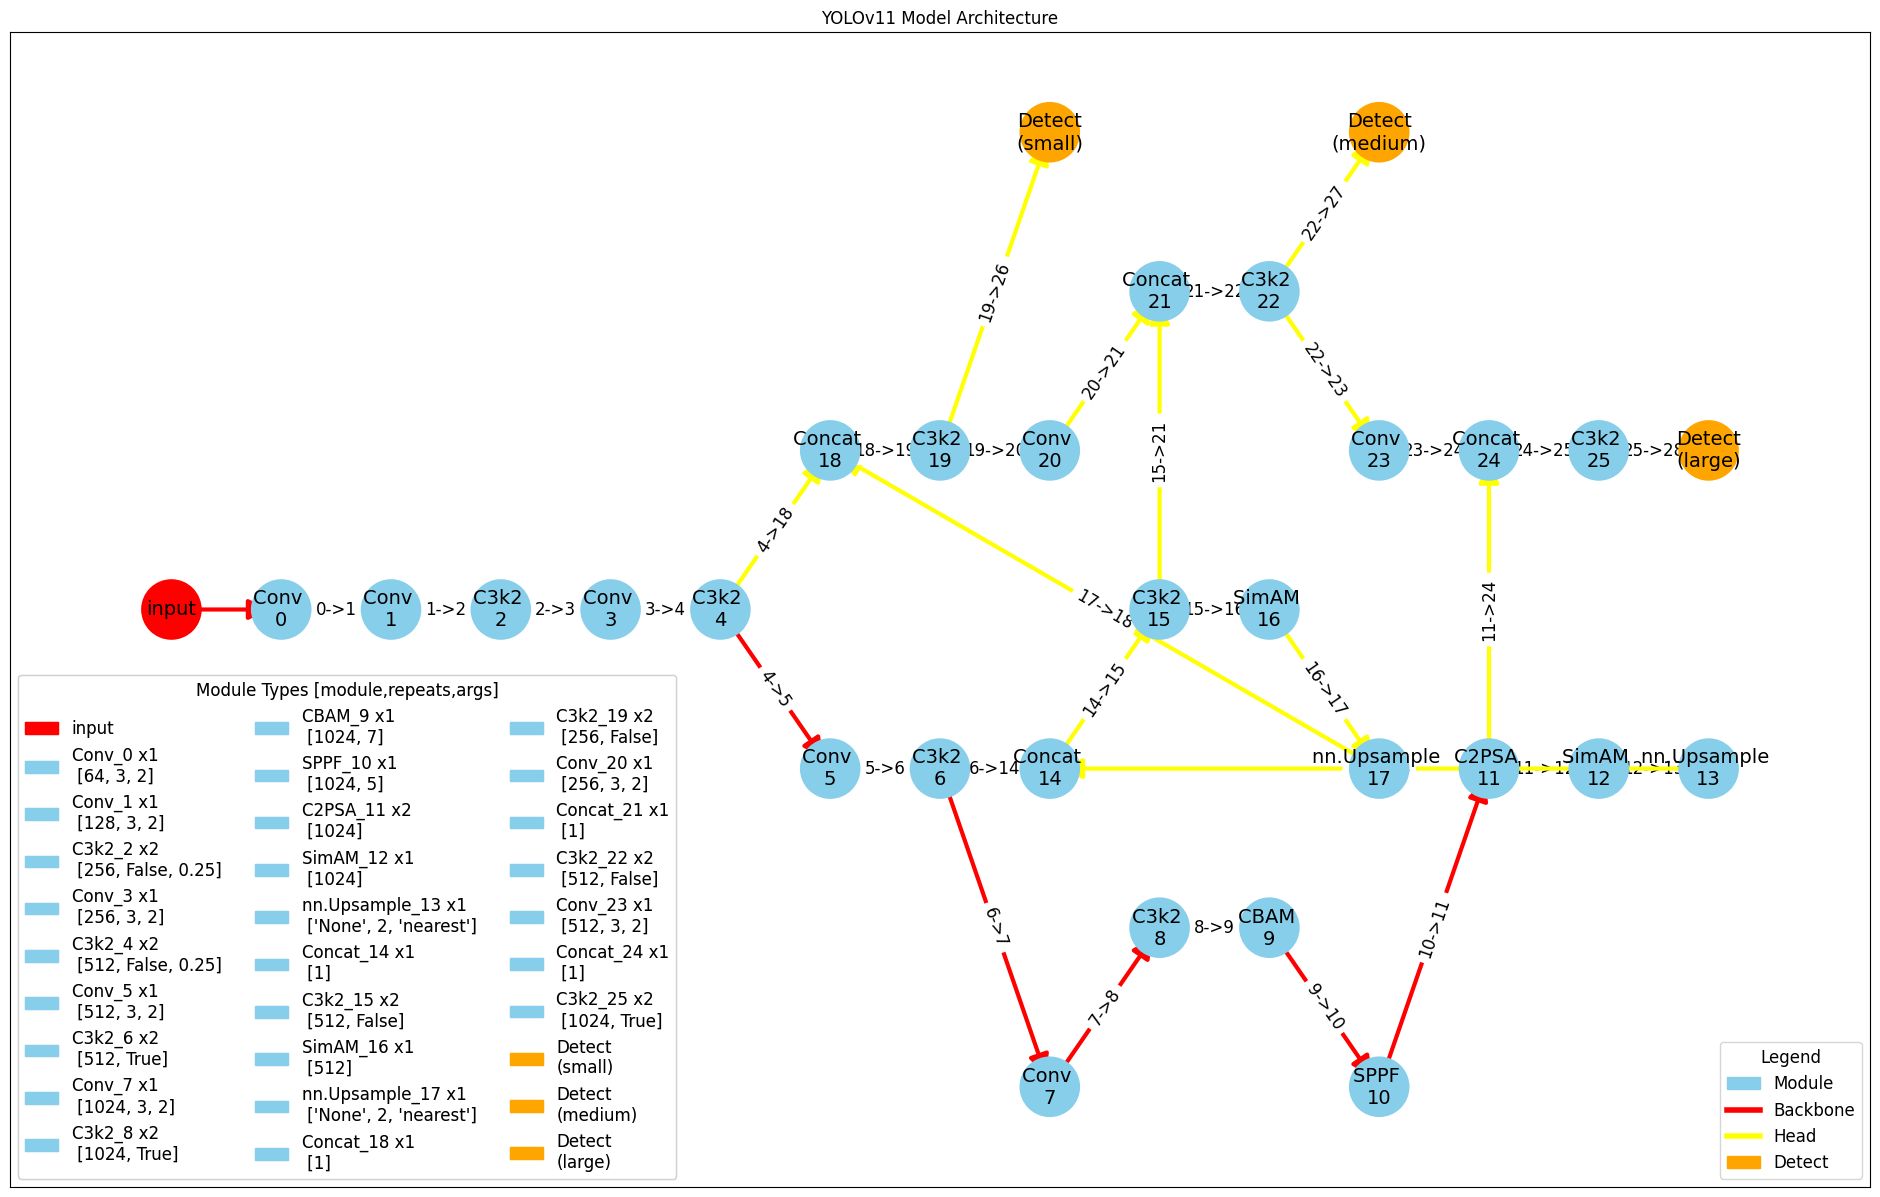

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import yaml

cfg = "ultralytics/cfg/models/11/yolo11n-SimAM.yaml"
inputNodeColor = 'red'
detectNodeColor = 'orange'
NodeColor = 'skyblue'
backboneEdgeColor = 'red'
headEdgeColor = 'yellow'

G = nx.DiGraph()
with open(cfg, 'r', encoding='utf-8') as file:
    data = yaml.safe_load(file)
    backbone_layers = data['backbone']
    head_layers = data['head']

nodes = []
G.add_node('input', layer_type='input', args=[],path = 'input', repeats=1)
for i, (fromNode, repeats, module, args) in enumerate(backbone_layers):
    nodeName = f'{module} \n{len(nodes)}'
    if i == 0:
        from_node = 'input'
    else:
        if fromNode == -1:
            from_node = list(nodes)[-1]
        else:
            from_node = list(nodes)[fromNode]
    G.add_node(nodeName, layer_type=module, args=args, path = f'backbone', repeats=repeats)
    nodes += [nodeName]
    G.add_edge(from_node, nodeName)

for i, (fromNode, repeats, module, args) in enumerate(head_layers):
    if fromNode == -1:
        from_node = list(nodes)[-1]
        nodeName = f'{module} \n{len(nodes)}'
        G.add_node(nodeName, layer_type=module, args=args, path = f'head', repeats=repeats)
        nodes += [nodeName]
        G.add_edge(from_node, nodeName)

    if type(fromNode) == list:
        if module != 'Detect':
            nodeName = f'{module} \n{len(nodes)}'
            G.add_node(nodeName, layer_type=module, args=args, path = f'head', repeats=repeats)
            nodes += [nodeName]
            for from_node in fromNode:
                if from_node == -1:
                    from_node = list(nodes)[-2]
                    G.add_edge(from_node, nodeName)
                else:
                    G.add_edge(list(nodes)[from_node], nodeName)
        else:
            for i,(from_node) in enumerate(fromNode):
                nodeName = f'Detect'
                if i == 0:
                    nodeName = f'Detect\n(small)'
                if i == 1:
                    nodeName = f'Detect\n(medium)'
                if i == 2:
                    nodeName = f'Detect\n(large)'
                G.add_node(nodeName, layer_type=module, args=args, path = f'Detect', repeats=repeats)
                nodes += [nodeName]
                G.add_edge(list(nodes)[from_node], nodeName)

pos = nx.bfs_layout(G, 'input',align='vertical')
plt.figure(figsize=(16*1.5, 10*1.5))
node_colors = []
for node in G.nodes():
    if G.nodes[node]["path"] == 'input':
        node_colors.append(inputNodeColor)
    elif G.nodes[node]["path"] == 'Detect':
        node_colors.append(detectNodeColor)
    else:
        node_colors.append(NodeColor)

nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, node_size=1000,
                 edge_color='gray', linewidths=12, font_size=14)


for (u, v, d) in G.edges(data=True):
    if G.nodes[v]["path"] == 'backbone':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=3, arrowstyle='-|>', edge_color=backboneEdgeColor,arrowsize=30)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=3, arrowstyle='-|>',edge_color=headEdgeColor,arrowsize=30)
    if G.nodes[u]["path"] != 'input' and G.nodes[v]["path"] != 'input':
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{nodes.index(u)}->{nodes.index(v)}'}, font_size=12)


legend_elements = [
    plt.Circle((0, 0), 1, color=NodeColor, label='Module'),
                   plt.Line2D([0], [0], color=backboneEdgeColor, lw=4, label='Backbone'),
                   plt.Line2D([0], [0], color=headEdgeColor, lw=4, label='Head'),
    plt.Circle((0, 0), 1, color=detectNodeColor, label='Detect')
]

legend1 = plt.legend(handles=legend_elements, loc='lower right', title='Legend', fontsize='large',title_fontsize='large')

detail_legent = []
for i,(node) in enumerate(G.nodes()):
    if G.nodes[node]["path"] != 'input' and G.nodes[node]["path"] != 'Detect':
        detail_legent.append(plt.Circle((0, 0), 1, color=node_colors[i], label=f'{G.nodes[node]["layer_type"]}_{i-1} x{G.nodes[node]["repeats"]}\n {G.nodes[node]["args"]}'))
    else:
        detail_legent.append(plt.Circle((0, 0), 1, color=node_colors[i], label=f'{node}'))

legend2 = plt.legend(handles=detail_legent, loc='lower left', title='Module Types [module,repeats,args]', fontsize='large', ncol=3,title_fontsize='large')

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.title('YOLOv11 Model Architecture')
plt.show()
